In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.preprocessing import StandardScaler
X = StandardScaler()

In [2]:
df = pd.read_csv("cubic_zirconia.csv")  

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

The field depth has 697 null values which need to be handled.

In [7]:
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [9]:
df[df['depth'].isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B184092488>,
      dtype=object)

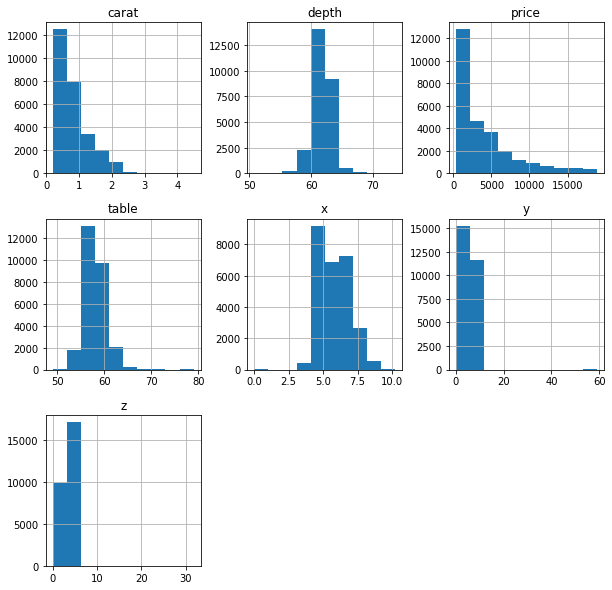

In [10]:
df.hist(figsize=(10,10),bins=10)


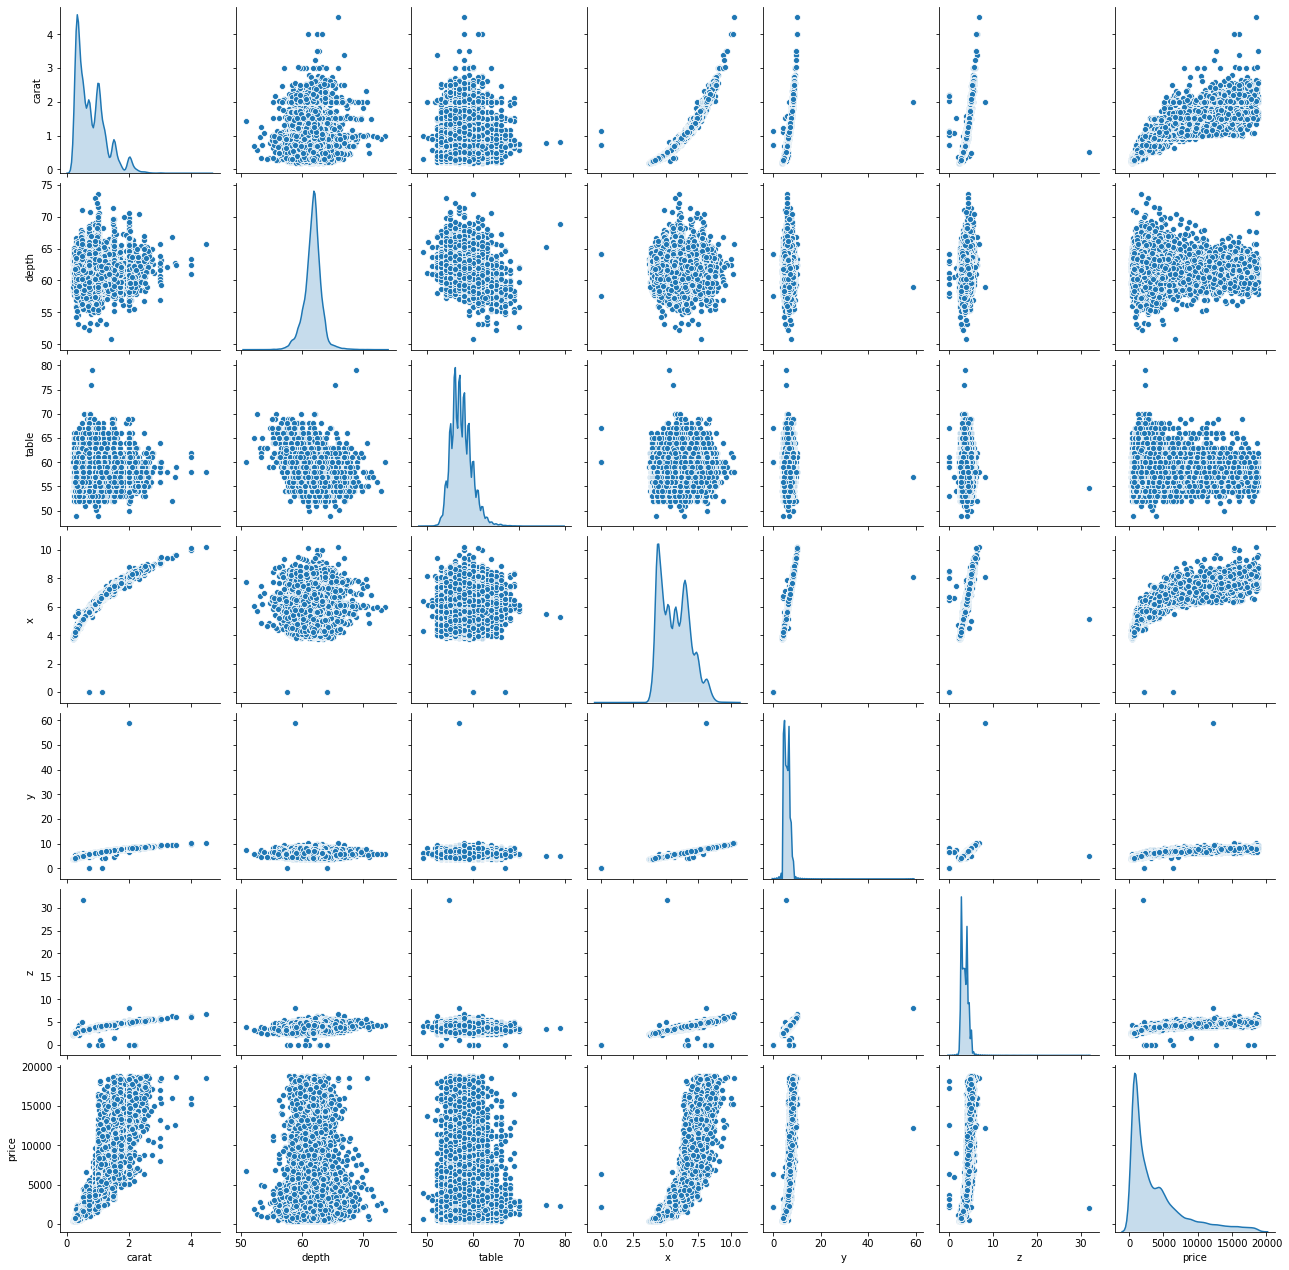

In [11]:
sns.pairplot(df,diag_kind='kde')

The variables carat and x has an impact on price. It can be observed that as carat increases, price is also increasing.  Similarly as variable x increases, price is also increasing. The variable depth looks normally distributed from the plot shown.

In [12]:
#plt.figure(figsize=(5,5))
#ax = sns.catplot(x="no_older_children",kind='point',data=df,y='price')

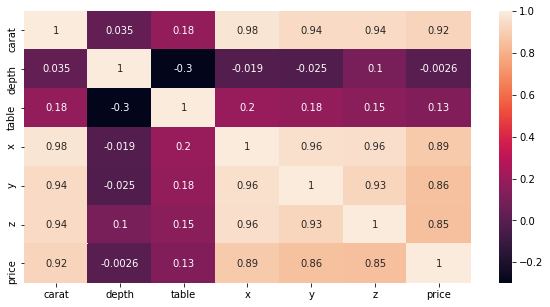

In [13]:
plt.figure(figsize =(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Above heat map containing the correlation matrix shows price is has a high positive correlation with variables carat, x, y, z which indicates that as any of the variables carat, x, y or z increase the variable price also tend to increase

In [14]:
Desc = pd.DataFrame()
Desc['Variables'] = ['carat', 'depth', 'table', 'x',
       'y', 'z','price']
Desc['IQR'] = [np.quantile(df['carat'],0.75) - np.quantile(df['carat'],0.25),
               np.quantile(df['depth'],0.75) - np.quantile(df['depth'],0.25),
               np.quantile(df['table'],0.75) - np.quantile(df['table'],0.25),
               np.quantile(df['x'],0.75) - np.quantile(df['x'],0.25),
               np.quantile(df['y'],0.75) - np.quantile(df['y'],0.25),
               np.quantile(df['z'],0.75) - np.quantile(df['z'],0.25),
               np.quantile(df['price'],0.75) - np.quantile(df['price'],0.25),
              ]
Desc['Range'] = [df['carat'].max()-df['carat'].min(),
                 df['depth'].max()-df['depth'].min(),
                 df['table'].max()-df['table'].min(),
                 df['x'].max()-df['x'].min(),
                 df['y'].max()-df['y'].min(),
                 df['z'].max()-df['z'].min(),
                 df['price'].max()-df['price'].min()
                ]
Desc['Mean'] = [df['carat'].mean(),
                 df['depth'].mean(),
                 df['table'].mean(),
                 df['x'].mean(),
                 df['y'].mean(),
                 df['z'].mean(),
                 df['price'].mean()
                ]
Desc['Median'] = [df['carat'].median(),
                 df['depth'].median(),
                 df['table'].median(),
                 df['x'].median(),
                 df['y'].median(),
                 df['z'].median(),
                 df['price'].median()
                ]
Desc['Mode'] =  [df['carat'].mode()[0],
                 df['depth'].mode()[0],
                 df['table'].mode()[0],
                 df['x'].mode()[0],
                 df['y'].mode()[0],
                 df['z'].mode()[0],
                 df['price'].mode()[0]
                ]
Desc

,Variables,IQR,Range,Mean,Median,Mode
0,carat,0.65,4.30,0.798375,0.70,0.30
1,depth,NaN,22.80,61.745147,61.80,62.00
2,table,3.00,30.00,57.456080,57.00,56.00
3,x,1.84,10.23,5.729854,5.69,4.38
4,y,1.83,58.90,5.733569,5.71,4.35
5,z,1.14,31.80,3.538057,3.52,2.69
6,price,4415.00,18492.00,3939.518115,2375.00,544.00


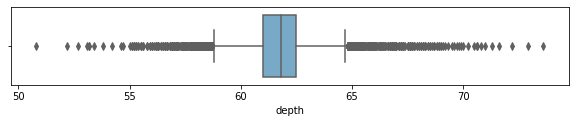

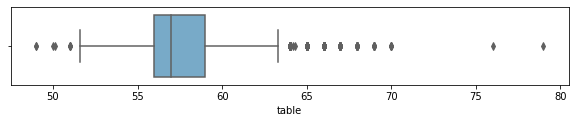

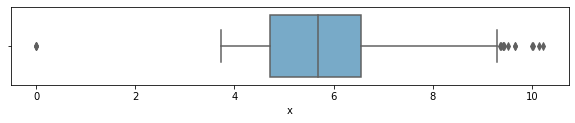

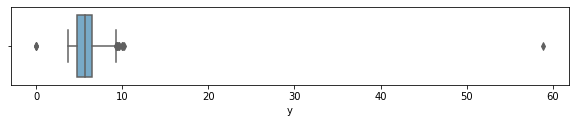

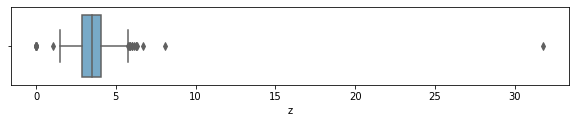

In [15]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['depth'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['table'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['x'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['y'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['z'],palette = 'Blues')

### Treating Outliers

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [17]:
lrincome,urincome=remove_outlier(df['depth'])
df['depth']=np.where(df['depth']>urincome,urincome,df['depth'])
df['depth']=np.where(df['depth']<lrincome,lrincome,df['depth'])

lrincome,urincome=remove_outlier(df['table'])
df['table']=np.where(df['table']>urincome,urincome,df['table'])
df['table']=np.where(df['table']<lrincome,lrincome,df['table'])

lrincome,urincome=remove_outlier(df['x'])
df['x']=np.where(df['x']>urincome,urincome,df['x'])
df['x']=np.where(df['x']<lrincome,lrincome,df['x'])


lrincome,urincome=remove_outlier(df['y'])
df['y']=np.where(df['y']>urincome,urincome,df['y'])
df['y']=np.where(df['y']<lrincome,lrincome,df['y'])

lrincome,urincome=remove_outlier(df['z'])
df['z']=np.where(df['z']>urincome,urincome,df['z'])
df['z']=np.where(df['z']<lrincome,lrincome,df['z'])

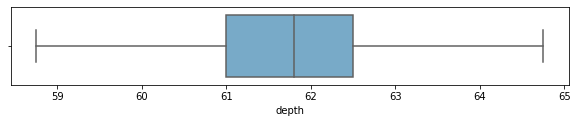

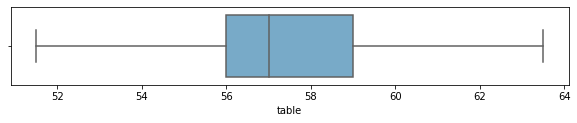

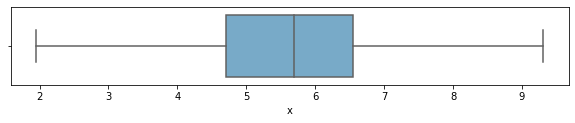

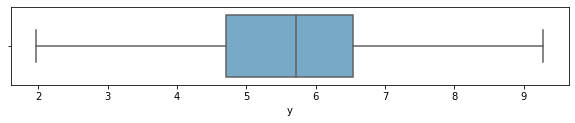

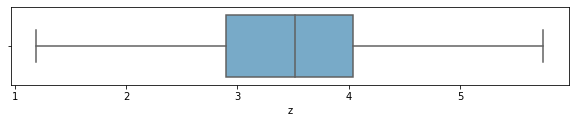

In [18]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['depth'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['table'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['x'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['y'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['z'],palette = 'Blues')

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

### Imputing Null Values

The field depth has 697 null values which need to be handled.

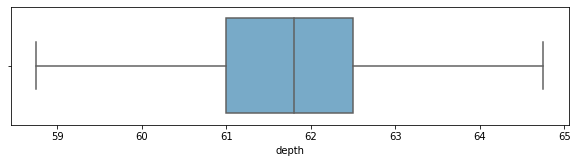

In [19]:
plt.figure(figsize =(10,10))
plt.subplot(4,1,1)
sns.boxplot(x=df['depth'],palette = 'Blues')

0    62.0
dtype: float64

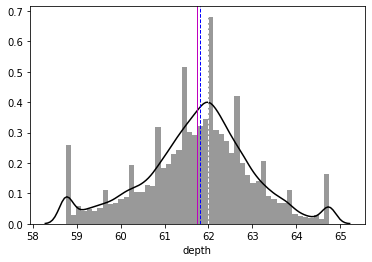

In [20]:
sns.distplot(df.depth,color = 'k',) 
plt.axvline(df.depth.mean(), color='m', linewidth=1)
plt.axvline(df.depth.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.depth.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.depth.mode()

Depth has outliers present.
Mean, Median and Mode has values 61.75,61.8 and 62 respectively which are approximately equal. 
Imputing the null values of Depth field with the mode.

In [21]:
mode = df['depth'].mode()[0]
df['depth'] = df['depth'].fillna(mode) 
mode

62.0

In [22]:
df[df['depth'].isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [23]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

(array([1365., 1063., 1804., 2993., 4993., 6859., 4067., 2060.,  973.,
         790.]),
 array([58.75, 59.35, 59.95, 60.55, 61.15, 61.75, 62.35, 62.95, 63.55,
        64.15, 64.75]),
 <a list of 10 Patch objects>)

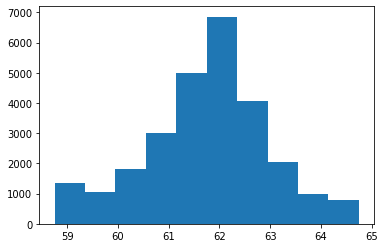

In [24]:
plt.hist(df['depth'])

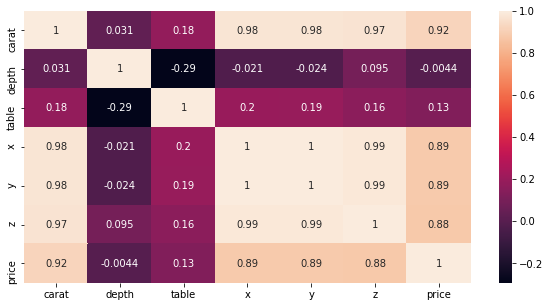

In [25]:
plt.figure(figsize =(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

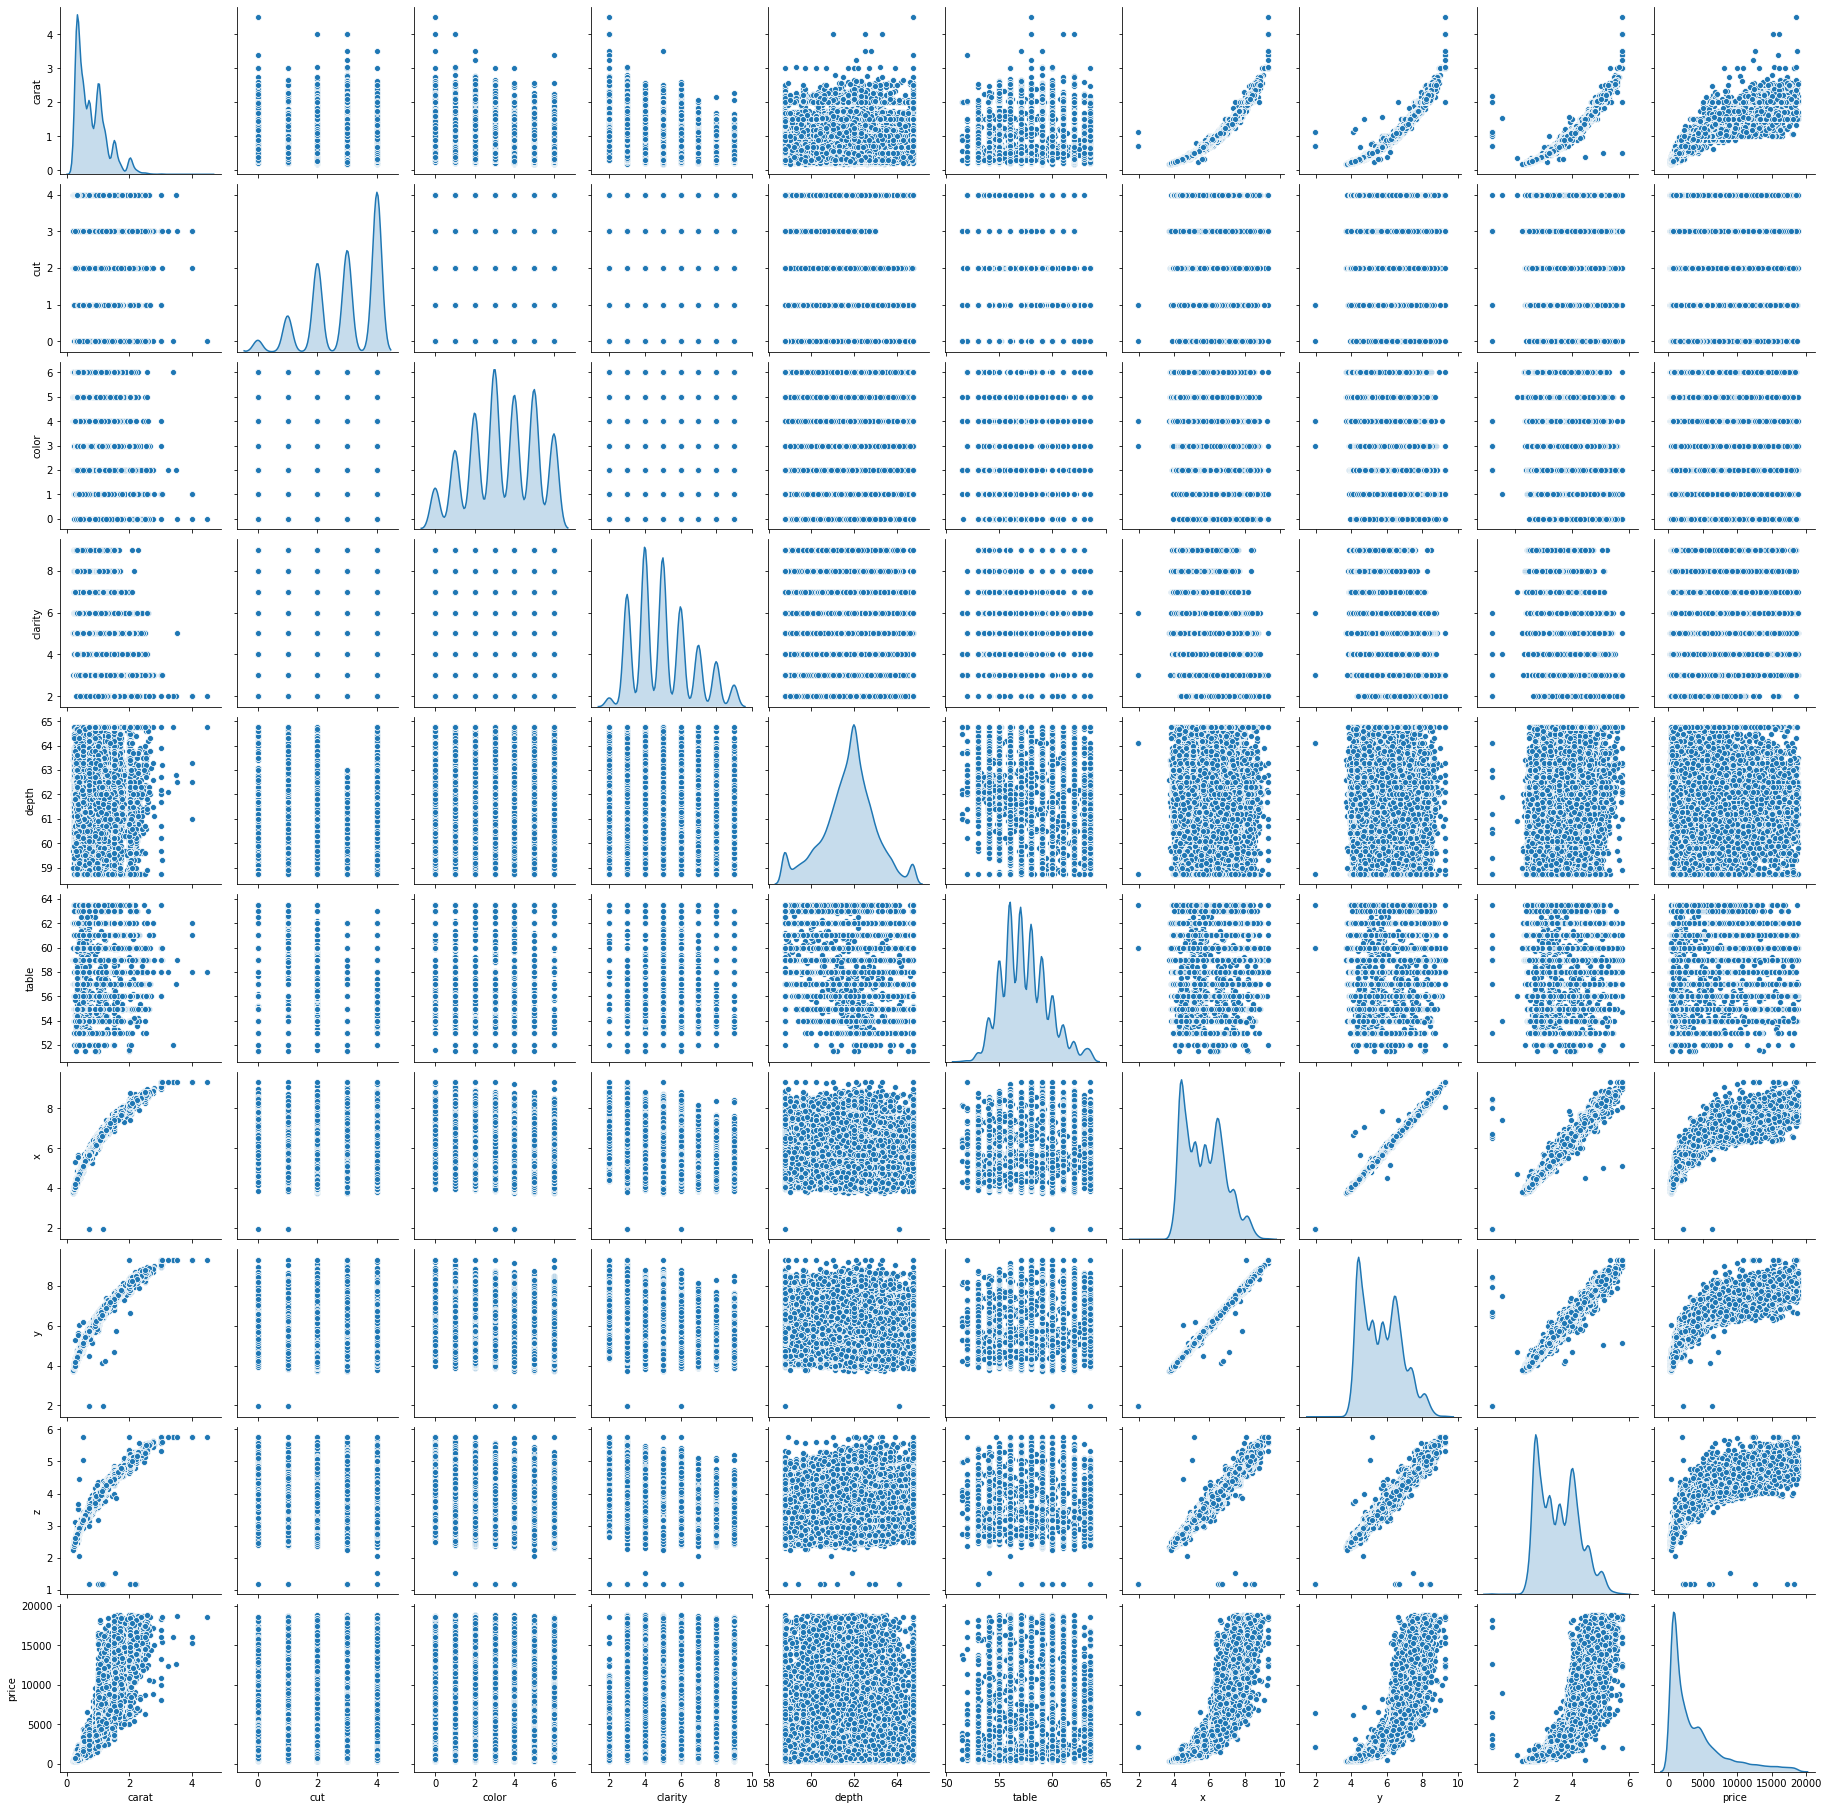

In [59]:
sns.pairplot(df,diag_kind='kde')

(array([1365., 1063., 1804., 2993., 4993., 6859., 4067., 2060.,  973.,
         790.]),
 array([58.75, 59.35, 59.95, 60.55, 61.15, 61.75, 62.35, 62.95, 63.55,
        64.15, 64.75]),
 <a list of 10 Patch objects>)

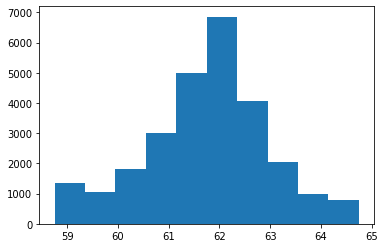

In [27]:
plt.hist(df['depth'])

### Checking for values which are zero

In [28]:
df[df[:]==0].count()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [29]:
df[(df['x']==0) | (df['y'] == 0) | (df['z'] == 0)] 

,carat,cut,color,clarity,depth,table,x,y,z,price


In [30]:
df.loc[(5821,6034,6215,10827,12498,12689,17506,18194,23758),:]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.10,60.0,1.95,1.965,1.19,2130
6034,2.02,Premium,H,VS2,62.70,53.0,8.02,7.950,1.19,18207
6215,0.71,Good,F,SI2,64.10,60.0,1.95,1.965,1.19,2130
10827,2.20,Premium,H,SI1,61.20,59.0,8.42,8.370,1.19,17265
12498,2.18,Premium,H,SI2,59.40,61.0,8.49,8.450,1.19,12631
12689,1.10,Premium,G,SI2,63.00,59.0,6.50,6.470,1.19,3696
17506,1.14,Fair,G,VS1,58.75,63.5,1.95,1.965,1.19,6381
18194,1.01,Premium,H,I1,58.75,59.0,6.66,6.600,1.19,3167
23758,1.12,Premium,G,I1,60.40,59.0,6.71,6.670,1.19,2383


There are nine records which has a value of zero foreither x, y or z variable.
No object can exist with length, width and height as zero. 
So these variables can not take a value zero and hence dropping these records from the data.

In [31]:
df = df.drop(index = df[(df['x']==0) | (df['y'] == 0) | (df['z'] == 0)].index,axis=1 )

In [32]:
for colname, coltype in df.dtypes.iteritems():
    if(coltype == object):
        print(df[colname].unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['E' 'G' 'F' 'D' 'H' 'J' 'I']
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


None of the categorical variable has the value zero or any ambiguous values

### Encoding the categorical variables

In [33]:
df.color.replace(['J','I','H','G','F','E','D'],[0,1,2,3,4,5,6],inplace=True )

In [34]:
df.cut.replace(['Fair','Good','Very Good','Premium','Ideal'],[0,1,2,3,4],inplace=True )

In [35]:
df.clarity.replace(['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True )

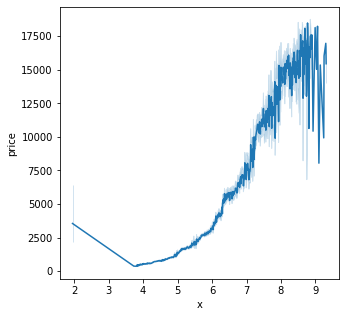

In [36]:
plt.figure(figsize=(5,5))
ax = sns.lineplot(x="x",data=df,y='price')

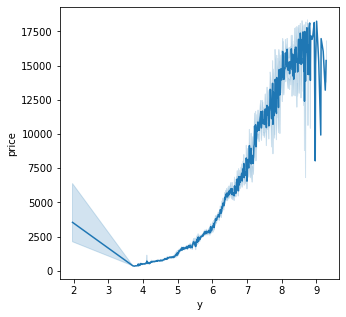

In [37]:
plt.figure(figsize=(5,5))
ax = sns.lineplot(x="y",data=df,y='price')

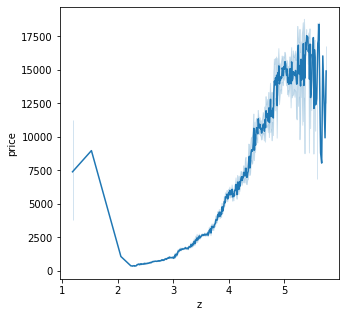

In [38]:
plt.figure(figsize=(5,5))
ax = sns.lineplot(x="z",data=df,y='price')

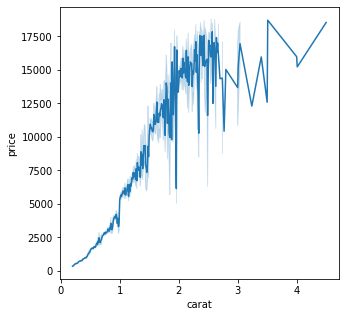

In [39]:
plt.figure(figsize=(5,5))
ax = sns.lineplot(x="carat",data=df,y='price')

### Scaling

Scaling is not necessary for Linear Regression as there is no distance based calculation or Gradient Descent being used. Scaling can also be avoided as most of the variables are in same range and same scale except price. 

In [40]:
#df['scaled_price'] = X.fit_transform(df[['price']])[:,0]
#df = df.drop('price',axis=1)
#df

### Data Split: Split the data into test and train (70:30).

In [41]:
# Copy all the independent variables into X dataframe
X = df.drop('price', axis=1)

# Copy target variable into the y dataframe. 
y = df[['price']]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70 , random_state=1)

### Linear Regression using statsmodels

In [43]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test,y_test],axis=1)
df_train

,carat,cut,color,clarity,depth,table,x,y,z,price
4446,2.01,3,1,5,62.1,59.0,8.06,7.98,4.98,15520
20854,0.24,4,4,5,61.8,57.0,3.97,4.02,2.47,417
20422,0.37,4,1,5,61.5,56.0,4.60,4.63,2.84,537
11225,0.31,1,2,6,63.6,55.0,4.32,4.29,2.74,698
26715,0.37,3,6,8,61.4,58.0,4.65,4.63,2.85,1142
...,...,...,...,...,...,...,...,...,...,...
10955,0.21,3,6,5,61.6,59.0,3.82,3.78,2.34,386
17289,0.31,3,2,5,61.9,58.0,4.39,4.37,2.71,628
5192,2.01,4,5,3,62.2,57.0,8.04,8.09,5.02,17688
12172,1.54,4,1,3,60.3,59.0,7.43,7.46,4.49,8092


In [44]:
df_test

,carat,cut,color,clarity,depth,table,x,y,z,price
18031,2.01,0,1,3,64.75,61.0,7.81,7.75,5.17,10671
26051,1.51,3,4,4,62.20,59.0,7.34,7.30,4.55,11607
16279,0.50,2,2,4,60.90,61.0,5.06,5.15,3.11,1133
16466,0.31,4,5,6,62.00,56.0,4.39,4.44,2.66,626
19837,1.20,2,2,6,62.00,57.0,6.77,6.81,4.21,6177
...,...,...,...,...,...,...,...,...,...,...
4958,1.82,3,2,4,62.00,59.0,7.81,7.77,4.83,14949
19289,0.43,3,4,6,59.90,58.0,4.93,4.89,2.94,1129
10966,0.41,3,5,5,62.10,58.0,4.78,4.75,2.96,999
7075,0.31,3,6,6,62.00,58.0,4.45,4.40,2.64,1011


In [45]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [46]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = df_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     8440.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:11:48   Log-Likelihood:                -69168.
No. Observations:                8090   AIC:                         1.384e+05
Df Residuals:                    8080   BIC:                         1.384e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2076.3728   1402.393     -1.481      0.1

In [47]:
y_pred = lm1.predict(df_test)
y_train_pred = lm1.predict(df_train)

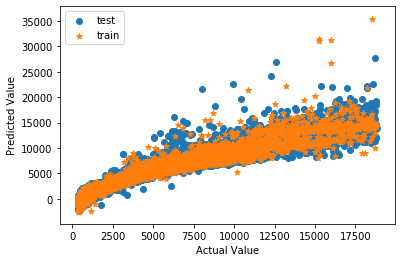

In [48]:
plt.scatter(y_test['price'], y_pred)
plt.scatter(y_train['price'], y_train_pred,marker='*')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend(['test','train'])
plt.show()

In [49]:
np.sqrt(lm1.mse_resid) 

1250.7792405324606

In [50]:
# Calculate MSE
mse = np.mean((lm1.predict(df_train.drop('price',axis=1))-df_train['price'])**2)
print(mse)

1562514.902973974


In [51]:
# Calculate RMSE
np.sqrt(mse)#*4024.865 + 3939.52

1250.0059611753752

In [52]:
np.sqrt(lm1.mse_total)

4031.658971083404

In [53]:
# Calculate RMSE for test data
mse = np.mean((lm1.predict(df_test.drop('price',axis=1))-df_test['price'])**2)
np.sqrt(mse)

1208.7980108077497

In [54]:
y_train_pred = lm1.predict(df_train)

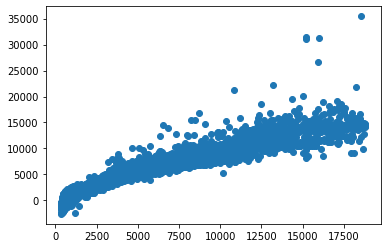

In [55]:
plt.scatter(y_train['price'], y_train_pred)
plt.show()

In [56]:
np.sqrt(lm1.mse_resid) 
lm1.rsquared

0.90385863664608

In [58]:
for i,j in np.array(lm1.params.reset_index()):
    print('({} * {}) +'.format(round(j,2),i),end=' ')

(-2076.37 * Intercept) + (9817.54 * carat) + (134.99 * cut) + (317.05 * color) + (500.9 * clarity) + (-30.84 * depth) + (-21.32 * table) + (-2005.28 * x) + (1656.33 * y) + (-194.68 * z) + 